In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
df = pd.read_csv("testset.csv")

In [3]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


# Part 1: A quick analysis of Weather in Delhi

In [4]:
df[' _conds'].value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Thunderstorm                  64
Light Fog                           64
Heavy Rain               

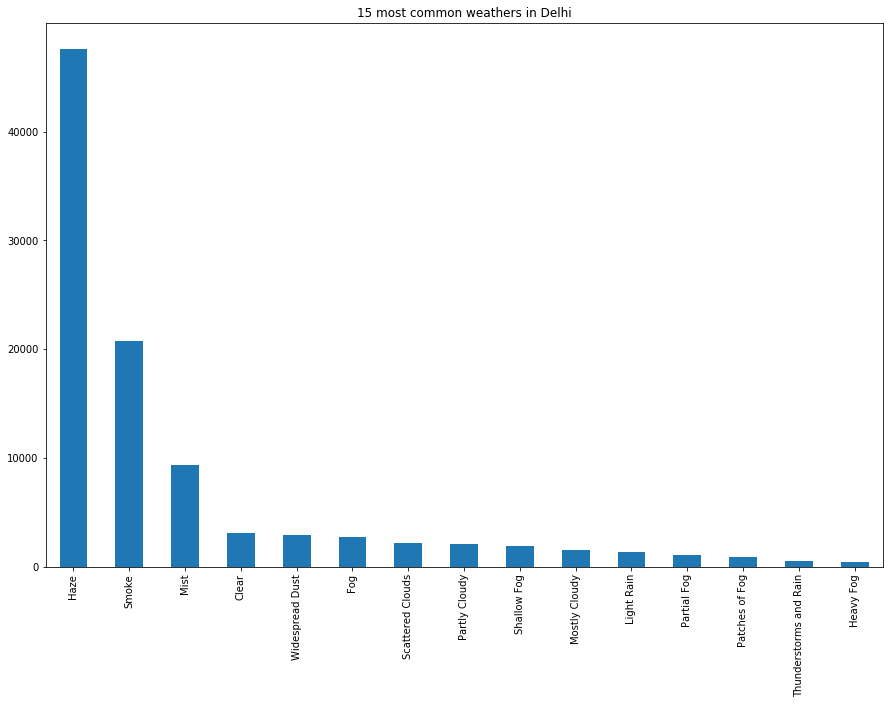

In [5]:
plt.figure(figsize=(15,10))
df[' _conds'].value_counts().head(15).plot(kind='bar')

plt.title('15 most common weathers in Delhi')
plt.show()

**Haze and Smoke are most common weatehrs conditions in Delhi**

[]

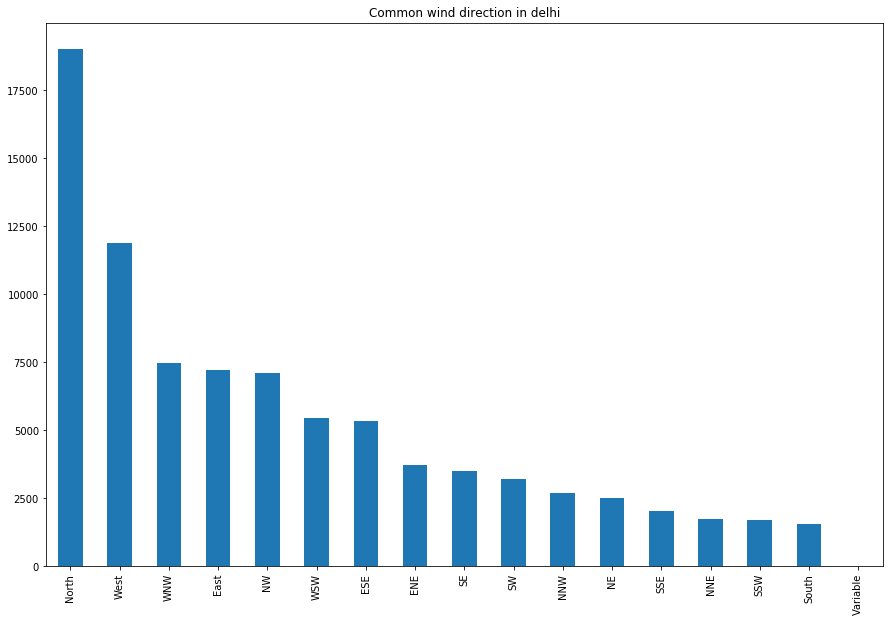

In [6]:
plt.figure(figsize=(15, 10))
plt.title("Common wind direction in delhi")
df[' _wdire'].value_counts().plot(kind="bar")
plt.plot()

**
North and West are the most common wind directions in dehi.**

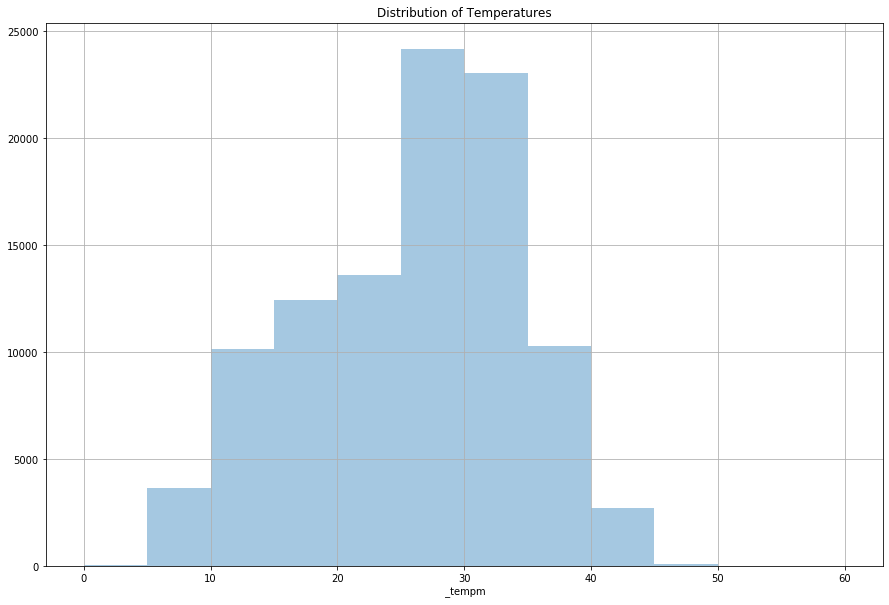

In [7]:
plt.figure(figsize=(15, 10))
sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

**Most common temperature scale in Delhi is from 25 to 35 degree.**

In [8]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [9]:
df['datetime_utc']

0        1996-11-01 11:00:00
1        1996-11-01 12:00:00
2        1996-11-01 13:00:00
3        1996-11-01 14:00:00
4        1996-11-01 16:00:00
                 ...        
100985   2017-04-24 06:00:00
100986   2017-04-24 09:00:00
100987   2017-04-24 12:00:00
100988   2017-04-24 15:00:00
100989   2017-04-24 18:00:00
Name: datetime_utc, Length: 100990, dtype: datetime64[ns]

In [10]:
# imputing the missing value in temperatre feature with mean.
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)

In [11]:
df[' _tempm'].isna().sum()
# filled all missing values with mean()

0

In [12]:
str(df['datetime_utc'][0])

'1996-11-01 11:00:00'

In [13]:
# a function to extract year part from the whole date
def get_year(x):
  return x[0:4]

In [14]:
# a function to extract month part from the whole date
def get_month(x):
  return x[5:7]

In [15]:
# making two new features year and month
df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))

In [16]:
df['year']

0         1996
1         1996
2         1996
3         1996
4         1996
          ... 
100985    2017
100986    2017
100987    2017
100988    2017
100989    2017
Name: year, Length: 100990, dtype: object

In [17]:
temp_year = pd.crosstab(df['year'], df['month'], values=df[' _tempm'], aggfunc='mean')

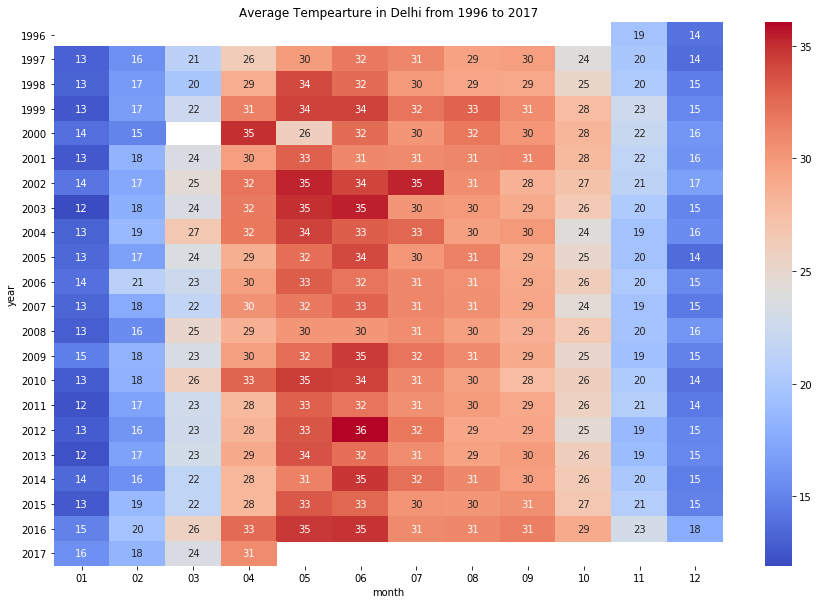

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture in Delhi from 1996 to 2017")
plt.show()

In [19]:
df[' _hum'].isna().sum()

757

In [20]:
# imputing missing values in _hum feature with mean
df[' _hum'].fillna(df[' _hum'].mean(), inplace=True)

In [21]:
humidity_year = pd.crosstab(df['year'], df['month'], values=df[' _hum'], aggfunc='mean')

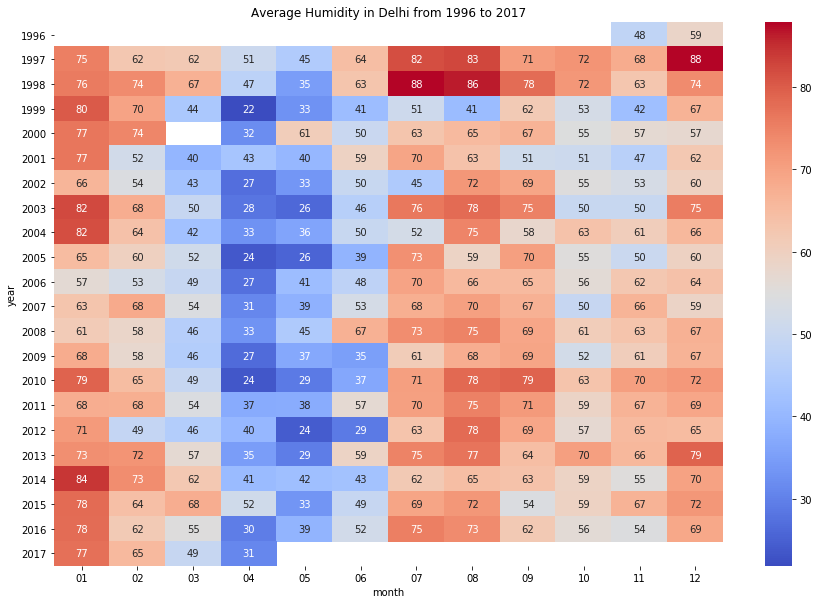

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(humidity_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in Delhi from 1996 to 2017")
plt.show()

# Part 2: Time Series Forecasting

In [23]:
# taking only temperature feature as values and datetime feature as index in the dataframe for time series forecasting of temperature
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [24]:
data

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
...,...
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0


In [25]:
# resampling data with date frequency for time series forecasting
data = data.resample('D').mean()

In [26]:
data.temp.isna().sum()

141

In [27]:
data.fillna(data['temp'].mean(), inplace=True)

In [28]:
data.temp.isna().sum()

0

In [29]:
data.shape

(7480, 1)

In [30]:
data

,temp
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


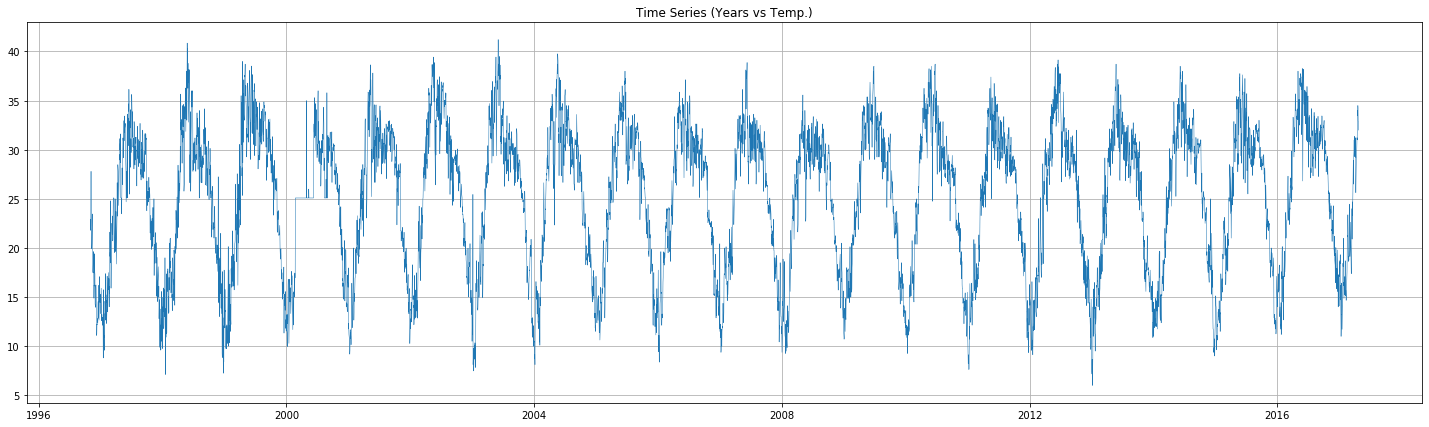

In [31]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [32]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [33]:
data_scaled

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [34]:
data_scaled.shape

(7480, 1)

In [35]:
steps = 30
inp = []
out = []
for i in range(len(data_scaled)- (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [36]:
import numpy as np
inp=np.asanyarray(inp)
out=np.asanyarray(out)

In [37]:
x_data_train = inp[:6702,:,:]
x_data_test = inp[6702:,:,:]    
y_data_train = out[:6702]    
y_data_test= out[6702:]

In [38]:
y_data_test.shape

(748, 1)

In [39]:
from keras import optimizers
from keras.callbacks import *
import keras 

# range of learning rates to tune
hyper_parameters_for_lr = [0.1, 0.01, 0.001]

# callback to append loss
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))



Using TensorFlow backend.
C:\Users\ravneets\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ravneets\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ravneets\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ravneets\Anaconda3\lib\site-packages\tensorflow\python\framewo

In [40]:
class DecayLR(keras.callbacks.Callback):
    def __init__(self, base_lr=0.001, decay_epoch=1):
        super(DecayLR, self).__init__()
        self.base_lr = base_lr
        self.decay_epoch = decay_epoch 
        self.lr_history = []
        
    # set lr on_train_begin
    def on_train_begin(self, logs={}):
        K.set_value(self.model.optimizer.lr, self.base_lr)

    # change learning rate at the end of epoch
    def on_epoch_end(self, epoch, logs={}):
        new_lr = self.base_lr * (0.5 ** (epoch // self.decay_epoch))
        self.lr_history.append(K.get_value(self.model.optimizer.lr))
        K.set_value(self.model.optimizer.lr, new_lr)
        
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
from tensorflow import keras
import tensorflow as tf
from keras import optimizers
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


In [41]:
LR = ReduceLROnPlateau(monitor = 'loss', factor = 0.5, patience = 2, verbose = 1, mode = 'min', \
                       cooldown=0, min_lr=0.0)

filepath = 'models/best_model.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'loss', verbose = 1, save_best_only = True, mode = 'max')

callbacks_list = [LR]

model = Sequential()
model.add(Conv1D(filters = 256, kernel_size = 2, activation = 'relu', input_shape = (30,1)))

model.add(Conv1D(filters = 128, kernel_size = 2, activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(LSTM(units = 50, return_sequences = True, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(100, return_sequences = True, activation = 'relu')))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = keras.optimizers.Adam())
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 256)           768       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 128)           65664     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 128)           0         
______________________________________________

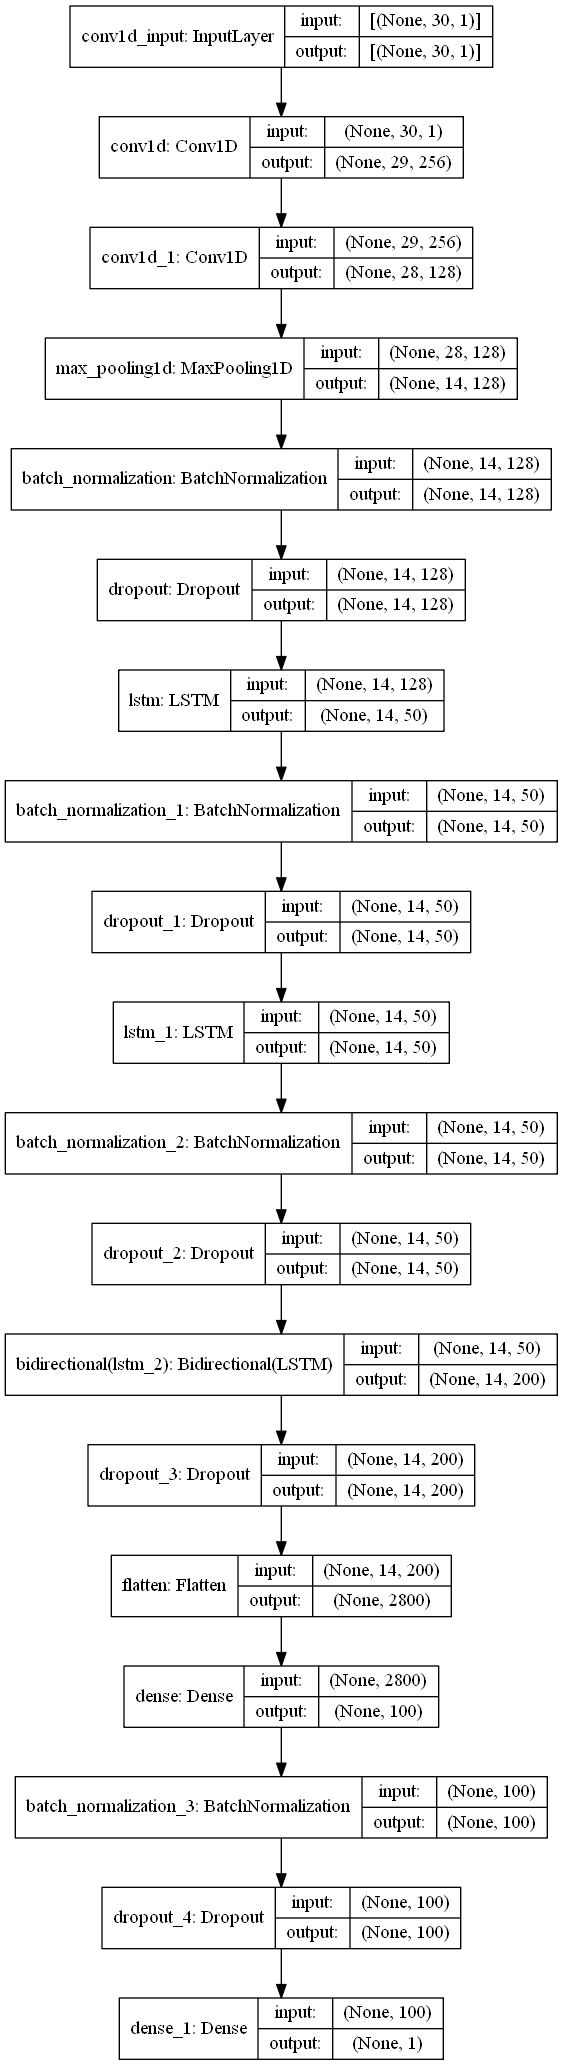

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes = True)

In [45]:
h = model.fit(x_data_train, y_data_train,epochs=300, verbose=1, callbacks = callbacks_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/300
6702/6702 [==============================] - 18s 3ms/sample - loss: 0.5959
Epoch 2/300
6702/6702 [==============================] - 14s 2ms/sample - loss: 0.2516
Epoch 3/300
6702/6702 [==============================] - 15s 2ms/sample - loss: 0.1564
Epoch 4/300
6702/6702 [==============================] - 16s 2ms/sample - loss: 0.1030
Epoch 5/300
6702/6702 [==============================] - 13s 2ms/sample - loss: 0.0689
Epoch 6/300
6702/6702 [==============================] - 13s 2ms/sample - loss: 0.0505
Epoch 7/300
6702/6702 [==============================] - 14s 2ms/sample - loss: 0.0385
Epoch 8/300
6702/6702 [==============================] - 13s 2ms/sample - loss: 0.0315
Epoch 9/300
6702/6702 [==============================] - 15s 2ms/sample - loss: 0.0284
Epoch 10/300
6702/6702 [==============================] - 15s 2ms/sample - loss: 0.02674s - l - ETA: 3s - loss: -
Epoch 11/

Epoch 62/300
6702/6702 [==============================] - 13s 2ms/sample - loss: 0.0171
Epoch 63/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0172
Epoch 00063: ReduceLROnPlateau reducing learning rate to 7.629394893626795e-09.
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0172
Epoch 64/300
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0178
Epoch 65/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0174
Epoch 00065: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0175
Epoch 66/300
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.01700
Epoch 67/300
6656/6702 [============================>.] - ETA: 0s - loss: 0.0177
Epoch 00067: ReduceLROnPlateau reducing learning rate to 1.907348723406699e-09.
6702/6702 [==============================] - 11s 2ms/sample - loss: 0.0177
Epoch 68/300
6702/6702 [===

6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0170
Epoch 115/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0162
Epoch 00115: ReduceLROnPlateau reducing learning rate to 4.547473724858043e-16.
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0162
Epoch 116/300
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0174
Epoch 117/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0165
Epoch 00117: ReduceLROnPlateau reducing learning rate to 2.2737368624290214e-16.
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0166
Epoch 118/300
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0176
Epoch 119/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0176
Epoch 00119: ReduceLROnPlateau reducing learning rate to 1.1368684312145107e-16.
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0176
Epoch 120/300
6702/6702 [=========

Epoch 164/300
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0176
Epoch 165/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0175
Epoch 00165: ReduceLROnPlateau reducing learning rate to 1.3552527799779304e-23.
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0175
Epoch 166/300
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0162
Epoch 167/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0171
Epoch 00167: ReduceLROnPlateau reducing learning rate to 6.776263899889652e-24.
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0171
Epoch 168/300
6702/6702 [==============================] - 12s 2ms/sample - loss: 0.0174
Epoch 169/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0168- ETA: 0s - loss: 0
Epoch 00169: ReduceLROnPlateau reducing learning rate to 3.388131949944826e-24.
6702/6702 [==============================] - 13s 2ms/sample - loss: 0.0168
Ep

Epoch 215/300
6702/6702 [==============================] - 16s 2ms/sample - loss: 0.0172
Epoch 216/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0173
Epoch 00216: ReduceLROnPlateau reducing learning rate to 4.0389680265722585e-31.
6702/6702 [==============================] - 15s 2ms/sample - loss: 0.0173
Epoch 217/300
6702/6702 [==============================] - 13s 2ms/sample - loss: 0.0169
Epoch 218/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0162
Epoch 00218: ReduceLROnPlateau reducing learning rate to 2.0194840132861292e-31.
6702/6702 [==============================] - 15s 2ms/sample - loss: 0.0162
Epoch 219/300
6702/6702 [==============================] - 14s 2ms/sample - loss: 0.0168
Epoch 220/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0166
Epoch 00220: ReduceLROnPlateau reducing learning rate to 1.0097420066430646e-31.
6702/6702 [==============================] - 14s 2ms/sample - loss: 0.0166
Epoch 221/300
6702/

Epoch 265/300
6702/6702 [==============================] - 15s 2ms/sample - loss: 0.0170
Epoch 266/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0176
Epoch 00266: ReduceLROnPlateau reducing learning rate to 1.2037062724149998e-38.
6702/6702 [==============================] - 14s 2ms/sample - loss: 0.0176
Epoch 267/300
6702/6702 [==============================] - 13s 2ms/sample - loss: 0.0169
Epoch 268/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0166
Epoch 00268: ReduceLROnPlateau reducing learning rate to 6.018531362074999e-39.
6702/6702 [==============================] - 13s 2ms/sample - loss: 0.0167
Epoch 269/300
6702/6702 [==============================] - 13s 2ms/sample - loss: 0.0169
Epoch 270/300
6688/6702 [============================>.] - ETA: 0s - loss: 0.0171
Epoch 00270: ReduceLROnPlateau reducing learning rate to 3.0092660313621155e-39.
6702/6702 [==============================] - 13s 2ms/sample - loss: 0.0171
Epoch 271/300
6702/6

In [ ]:
model.save("./regressor.hdf5")

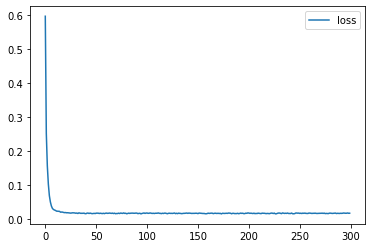

In [46]:


pd.DataFrame(h.history)[['loss']].plot();

In [47]:
predict = model.predict(x_data_test)

In [48]:
predict = scalar.inverse_transform(predict)

In [49]:
Ytesting = scalar.inverse_transform(y_data_test)

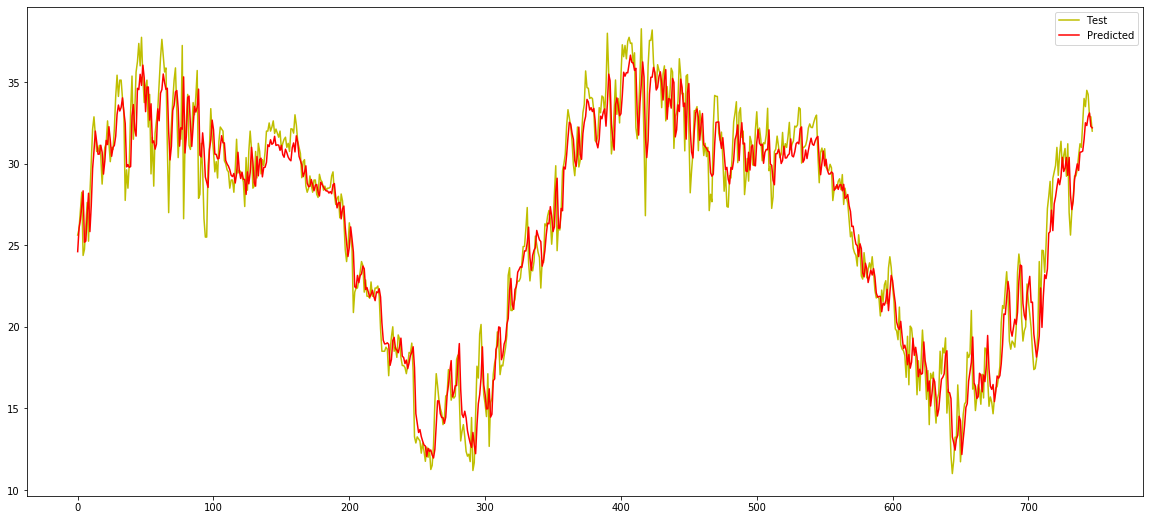

In [50]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'y')
plt.plot(predict,'r')
plt.legend(('Test','Predicted'))
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

2.6446410786406025

This is a demonstration of using CNN-LSTMs for Time Series Forecasting. We can also improve the model to make better predictions.
If you have any suggestion, please comment.

In [80]:

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series)
pyplot.show()

array([[[-0.07224714],
        [-0.0391131 ],
        [-0.10301445],
        ...,
        [-0.35724963],
        [-0.53166693],
        [-0.53268107]],

       [[-0.0391131 ],
        [-0.10301445],
        [-0.05015778],
        ...,
        [-0.53166693],
        [-0.53268107],
        [-0.54817231]],

       [[-0.10301445],
        [-0.05015778],
        [ 0.23826607],
        ...,
        [-0.53268107],
        [-0.54817231],
        [-0.47256032]],

       ...,

       [[-0.20478326],
        [-0.2970852 ],
        [-0.23318386],
        ...,
        [ 0.26703069],
        [ 0.05082212],
        [-0.14798206]],

       [[-0.2970852 ],
        [-0.23318386],
        [-0.3112855 ],
        ...,
        [ 0.05082212],
        [-0.14798206],
        [ 0.01142531]],

       [[-0.23318386],
        [-0.3112855 ],
        [-0.33258595],
        ...,
        [-0.14798206],
        [ 0.01142531],
        [ 0.07922272]]])